<a href="https://colab.research.google.com/github/kaipak/fastai-notebooks/blob/master/fastaiv2020_02_production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastbook
!pip install -Uqq fastai

     |████████████████████████████████| 720 kB 9.3 MB/s 
     |████████████████████████████████| 46 kB 5.5 MB/s 
     |████████████████████████████████| 188 kB 55.5 MB/s 
     |████████████████████████████████| 1.2 MB 57.7 MB/s 
     |████████████████████████████████| 56 kB 5.4 MB/s 
     |████████████████████████████████| 51 kB 403 kB/s 


In [ ]:
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [ ]:
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
key = os.environ.get('AZURE_SEARCH_KEY', '0f141de6ef77453fa116aec487b5dfe6')

In [ ]:
sf_pixel_savers = ['chun li', 'zangief', 'dhalsim', 'ryu', 'blanka']
path = Path('sf_chars')

if not path.exists():
  path.mkdir()
  for c in sf_pixel_savers:
    dest = (path/c)
    dest.mkdir(exist_ok=True)
    results = search_images_bing(key, f'{c} street fighter')
    print(c)
    download_images(dest, urls=results.attrgot('contentUrl'))

chun li
zangief
dhalsim
ryu
blanka


In [ ]:
fns = get_image_files(path)
fns

(#713) [Path('sf_chars/zangief/00000110.jpg'),Path('sf_chars/zangief/00000086.jpg'),Path('sf_chars/zangief/00000048.jpg'),Path('sf_chars/zangief/00000108.png'),Path('sf_chars/zangief/00000038.jpg'),Path('sf_chars/zangief/00000089.jpg'),Path('sf_chars/zangief/00000028.jpg'),Path('sf_chars/zangief/00000061.png'),Path('sf_chars/zangief/00000105.jpg'),Path('sf_chars/zangief/00000008.png')...]

In [ ]:
failed = verify_images(fns)
failed

(#7) [Path('sf_chars/chun li/00000026.jpg'),Path('sf_chars/chun li/00000093.jpg'),Path('sf_chars/blanka/00000135.jpg'),Path('sf_chars/blanka/00000006.jpg'),Path('sf_chars/dhalsim/00000123.jpg'),Path('sf_chars/dhalsim/00000144.jpg'),Path('sf_chars/ryu/00000123.jpg')]

In [ ]:
failed.map(Path.unlink);

In [ ]:
sf_chars = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [ ]:
dls = sf_chars.dataloaders(path)

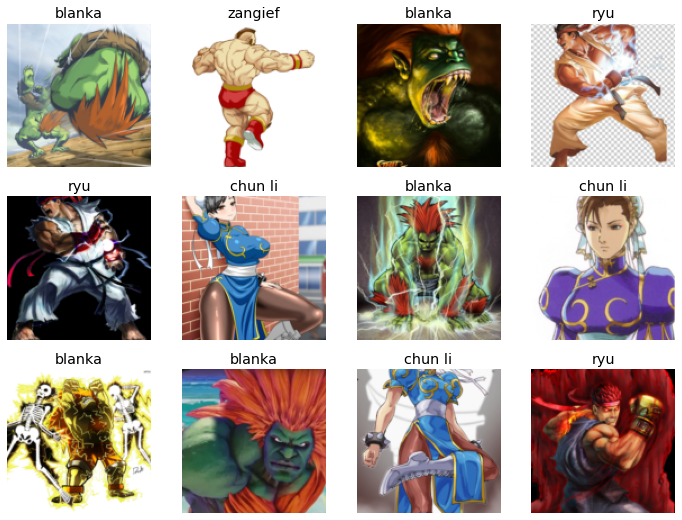

In [ ]:
dls.valid.show_batch(max_n=12, nrows=3)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


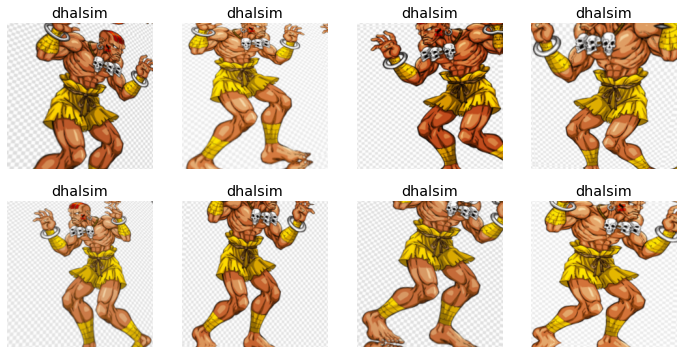

In [ ]:
sf_chars = sf_chars.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5), 
    batch_tfms=aug_transforms())
dls = sf_chars.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(6)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,error_rate,time
0,2.171999,1.409497,0.460993,00:27


epoch,train_loss,valid_loss,error_rate,time
0,0.935841,0.650728,0.219858,00:26
1,0.769257,0.430568,0.134752,00:25
2,0.593392,0.403950,0.127660,00:27
3,0.495041,0.396870,0.127660,00:25
4,0.406912,0.351271,0.106383,00:26
5,0.339750,0.337137,0.106383,00:26


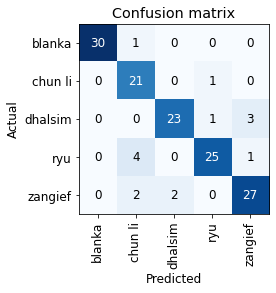

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

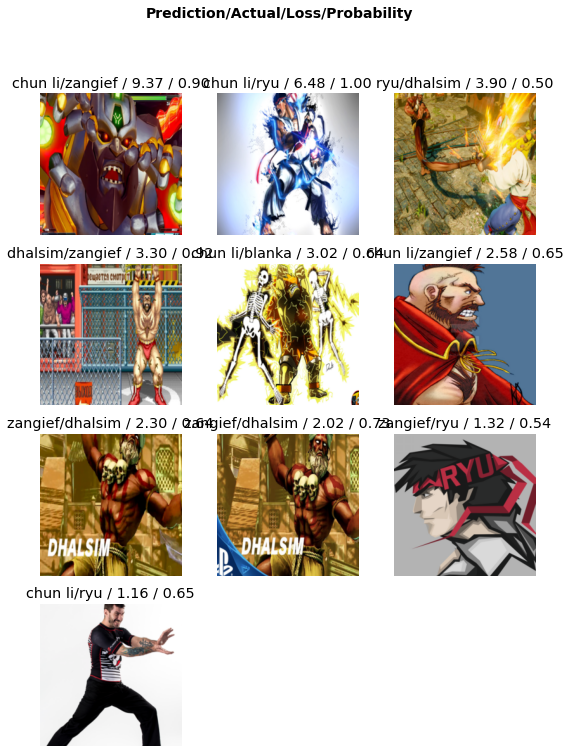

In [ ]:
interp.plot_top_losses(10, nrows=4)

In [ ]:
learn.export()


In [ ]:
path = Path('gd')
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
!ls -l gdriveXZ/MyDrive

total 13
drwx------ 2 root root 4096 Aug 15 05:20 'Colab Notebooks'
drwx------ 2 root root 4096 Jul 20 21:18  learning
-rw------- 1 root root  151 Aug  6 23:00 'Melissa Portugal Trip Cost Estimate.gsheet'
drwx------ 2 root root 4096 Jul 27 15:51 'Perle Education'
